In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv(r"E:\BIA\BIA-Projects\Laptop\laptop_price.csv", encoding='unicode_escape')


In [5]:
df.shape


(1303, 13)

In [6]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df["ScreenResolution"] = df["ScreenResolution"].str.extract(r'(\d+x\d+)')
df["Gpu"] = df["Gpu"].str.extract(r'(\d+)')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,650,macOS,1.37kg,1803.60


In [11]:
df["OpSys"].replace({'Windows 10 S':'Windows 10', 'Mac OS X' : 'macOS'}, inplace=True)
df= df[df["OpSys"] != 'Android']
df["OpSys"].value_counts()

C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_10132\3009151976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OpSys"].replace({'Windows 10 S':'Windows 10', 'Mac OS X' : 'macOS'}, inplace=True)


OpSys
Windows 10    1080
No OS           66
Linux           62
Windows 7       45
Chrome OS       27
macOS           21
Name: count, dtype: int64

In [12]:
df["Weight"].unique()
df.loc[:, "Weight"] = df["Weight"].str.replace("kg", "")
df["Weight"] = df["Weight"].astype("float64")

In [13]:
df["Ram"].unique()
df.loc[:, "Ram"] = df["Ram"].str.replace("GB", "")
df["Ram"] = df["Ram"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1301 non-null   int64  
 1   Company           1301 non-null   object 
 2   Product           1301 non-null   object 
 3   TypeName          1301 non-null   object 
 4   Inches            1301 non-null   float64
 5   ScreenResolution  1301 non-null   object 
 6   Cpu               1301 non-null   object 
 7   Ram               1301 non-null   int64  
 8   Memory            1301 non-null   object 
 9   Gpu               1271 non-null   object 
 10  OpSys             1301 non-null   object 
 11  Weight            1301 non-null   float64
 12  Price_euros       1301 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 142.3+ KB


<Axes: xlabel='Price_euros'>

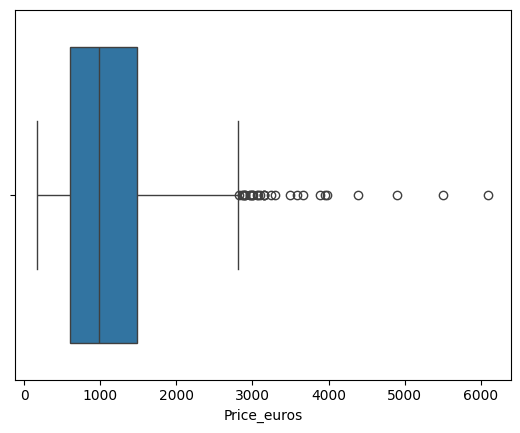

In [15]:
sns.boxplot(x = "Price_euros", data = df)

In [16]:
q1= df["Price_euros"].quantile(0.25)
q3= df["Price_euros"].quantile(0.75)

IQR = q3-q1

min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

df = df[df['Price_euros'] <= max_range]

C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_10132\1815304593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_euros"])


<Axes: xlabel='Price_euros', ylabel='Density'>

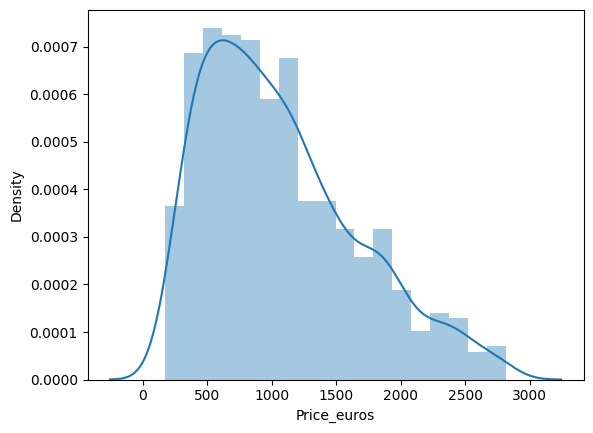

In [17]:
sns.distplot(df["Price_euros"])

In [18]:
le = LabelEncoder()

object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [19]:
df2 = df.copy()

In [20]:
x = df2.drop(columns=["Price_euros", "laptop_ID"])
y = df2["Price_euros"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [21]:
x_train.shape, x_test.shape

((1017, 11), (255, 11))

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1272 non-null   int64  
 1   Company           1272 non-null   int64  
 2   Product           1272 non-null   int64  
 3   TypeName          1272 non-null   int64  
 4   Inches            1272 non-null   float64
 5   ScreenResolution  1272 non-null   int64  
 6   Cpu               1272 non-null   int64  
 7   Ram               1272 non-null   int64  
 8   Memory            1272 non-null   int64  
 9   Gpu               1272 non-null   int64  
 10  OpSys             1272 non-null   int64  
 11  Weight            1272 non-null   float64
 12  Price_euros       1272 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 139.1 KB


In [24]:
y_pred = lr.predict(x_test)

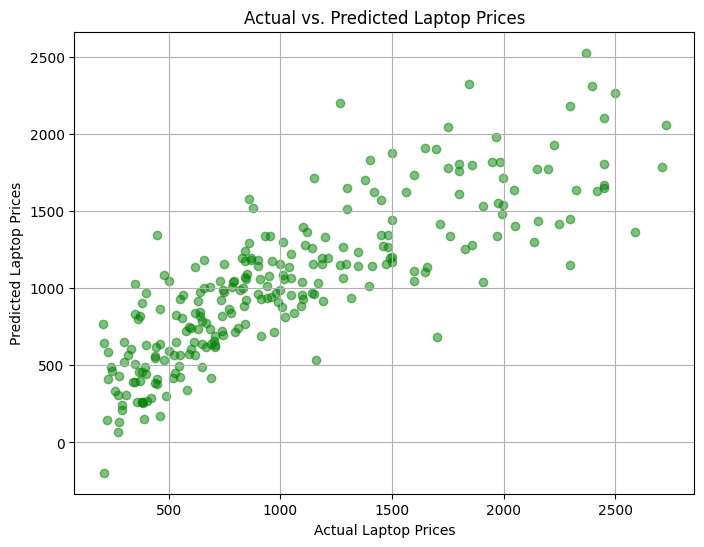

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.xlabel('Actual Laptop Prices')
plt.ylabel('Predicted Laptop Prices')
plt.title('Actual vs. Predicted Laptop Prices')
plt.grid(True)
plt.show()

In [26]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 259.49
mean_squared_error : 120242.42
r2_score : 0.69
